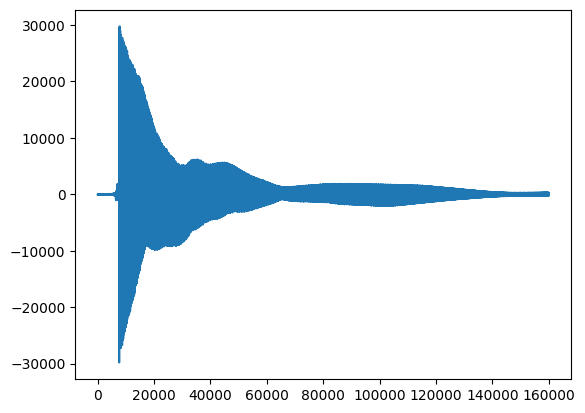

In [284]:
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
import scipy 

def read_wave(filename):
    return read(filename)

samplerate, data = read_wave("sounds/note_guitare_LAd.wav")
plt.plot(data)
plt.show()

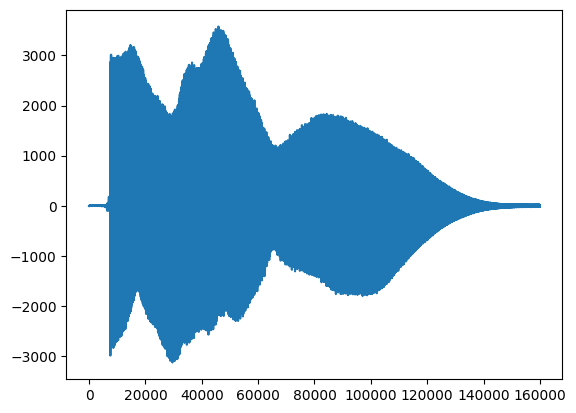

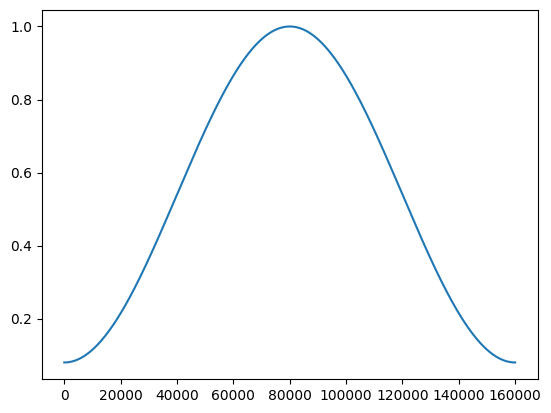

In [285]:
fenetre = np.hamming(len(data)) 
signal =  fenetre * data
plt.plot(signal)
plt.show()

plt.plot(fenetre)
plt.show()

1688
465.255


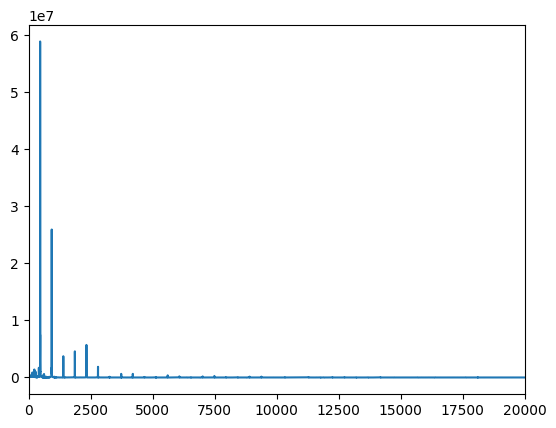

In [286]:
fft_spect = np.fft.rfft(signal)
arr_freq = np.fft.rfftfreq(signal.size, d=1./samplerate)
amp_fft_spect = np.abs(fft_spect)
phase_fft_spect = np.angle(fft_spect)

# normalisation
# amp_fft_spect /= np.max(amp_fft_spect)

# plt.plot(amp_fft_spect)
# plt.show()

print(np.argmax(amp_fft_spect))
print(arr_freq[np.argmax(amp_fft_spect)])

plt.plot(arr_freq, amp_fft_spect)
plt.xlim(0, 20000)
plt.show()

In [287]:
# Aller chercher les 32 plus grosses amp et leur freq
N = 32
inx = np.argpartition(amp_fft_spect, -N)[-N:]
for i in inx:
    print(f"freq : {arr_freq[i]}, amp : {amp_fft_spect[i]}")

freq : 1399.62375, amp : 3721522.1134827547
freq : 468.01125, amp : 3924659.693224809
freq : 933.541875, amp : 3956528.7157881833
freq : 463.60125, amp : 4663309.28769365
freq : 467.735625, amp : 5489318.348885138
freq : 463.87687500000004, amp : 5469446.526528828
freq : 464.15250000000003, amp : 4983726.146110428
freq : 464.70375, amp : 5440871.321738269
freq : 2332.33875, amp : 4649272.580246809
freq : 2332.063125, amp : 5702488.85368055
freq : 1865.43, amp : 4577236.343182391
freq : 931.8881250000001, amp : 4346763.042699645
freq : 463.325625, amp : 5898910.151667076
freq : 462.774375, amp : 6624777.109629704
freq : 932.990625, amp : 8675812.207418546
freq : 463.05, amp : 7494270.246255367
freq : 467.46000000000004, amp : 6335122.331215268
freq : 932.16375, amp : 8785281.755381482
freq : 464.428125, amp : 6668614.332361306
freq : 467.184375, amp : 8551430.449228147
freq : 931.3368750000001, amp : 7328806.124547562
freq : 466.90875, amp : 11034386.208157087
freq : 931.6125000000001, 

[  465.255   930.51   1395.765  1861.02   2326.275  2791.53   3256.785
  3722.04   4187.295  4652.55   5117.805  5583.06   6048.315  6513.57
  6978.825  7444.08   7909.335  8374.59   8839.845  9305.1    9770.355
 10235.61  10700.865 11166.12  11631.375 12096.63  12561.885 13027.14
 13492.395 13957.65  14422.905 14888.16 ]


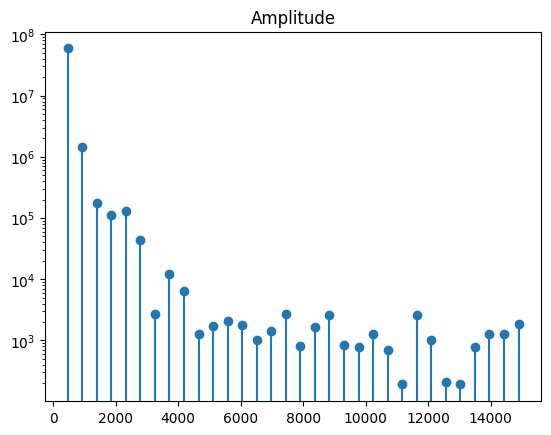

In [288]:
# Frequences fondamentales
freq_fondamentale = arr_freq[np.argmax(amp_fft_spect)] 
freq_harmoniques = np.arange(freq_fondamentale, (N + 1)*freq_fondamentale, freq_fondamentale)
print(freq_harmoniques) 

# Find nearest freq_harmoniques in freq
#  where is freq_f in freq ?
def find_nearest_idx(arr, val):
    arr = np.asarray(arr)
    return (np.abs(arr - val)).argmin()

real_freq_harmoniques = []
arr_amp_n = []
arr_phase_n = []

for f_h in freq_harmoniques:
    idx = find_nearest_idx(arr_freq, f_h)
    real_freq_harmoniques.append(arr_freq[idx])
    arr_amp_n.append(amp_fft_spect[idx])
    arr_phase_n.append(phase_fft_spect[idx])
    

plt.stem(real_freq_harmoniques,  arr_amp_n)
plt.title('Amplitude')
plt.yscale('log')
plt.show()



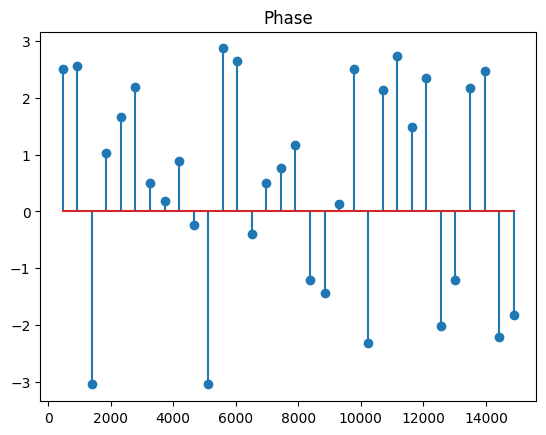

In [289]:
plt.stem(real_freq_harmoniques, arr_phase_n)
plt.title('Phase')
plt.show()

In [290]:
# Trouver la valeur de N
H_0 = 1
H_3 = pow(10, -3/20)
w_h = np.pi / 1000

print(f"On veut {H_3}")

# N_h = 800
sum_rep = 0
for N_h in range(880, 890):
    for n in range(N_h):
        sum_rep += np.exp(-1j * w_h * n)

    sum_rep *= 1/N_h
    print(f"N = {N_h} rep : {np.abs(sum_rep)}")


On veut 0.7079457843841379
N = 880 rep : 0.7106178899099431
N = 881 rep : 0.7108297048385807
N = 882 rep : 0.7102338414618241
N = 883 rep : 0.7096366645639285
N = 884 rep : 0.7090390902642911
N = 885 rep : 0.7084411204378344
N = 886 rep : 0.707842755923445
N = 887 rep : 0.7072439975593582
N = 888 rep : 0.7066448461843263
N = 889 rep : 0.70604530263762


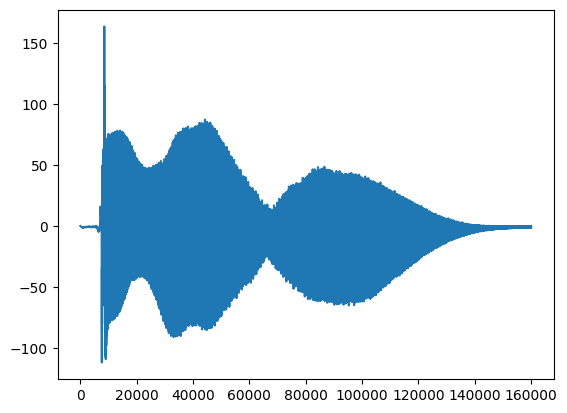

In [291]:
# Enveloppe temporelle
N_h = 886
# env_temp = np.convolve(signal, 1/N_h)
coeff = np.multiply(np.ones(N_h), 1/N_h)
env_temp = scipy.signal.lfilter(coeff, 1, signal)

plt.plot(env_temp)
plt.show()
# env_temp = scipy.signal.lfilter(env_temp, data.size, data)



In [292]:
def create_signal(harmoniques, arr_amp, arr_phase, env_temp):
    y_sum = 0
    length = 3
    # t = np.linspace(0, length, samplerate * length)
    # t = []
    # for i in range(len(signal)):
    #     t.append(i)

    # t = np.array(t)

    t = np.divide(np.arange(0, len(signal)), samplerate)
    print(t)
    
    for i, f in enumerate(harmoniques):
        y_sum +=  arr_amp[i]*np.sin(f * 2 * np.pi * t + arr_phase[i]) 
    
    return y_sum
    # return np.multiply(y_sum, env_temp)


def create_note(signal, samplerate, filename):
    write(f"sounds/notes/{filename}.wav", samplerate, signal.astype(np.int32))

# Creation A#
# create_note(real_freq_harmoniques, arr_amp_n, arr_phase_n, samplerate, 'A#')


In [ ]:
print(len(signal))

In [294]:
# Application de l'enveloppe temporelle
new_signal = create_signal(real_freq_harmoniques, arr_amp_n, arr_phase_n, env_temp)
# new_signal = np.multiply(new_signal, env_temp[:132300])

create_note(new_signal, samplerate, 'A#')

# plt.plot(new_signal)
# plt.show()


[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]


In [295]:
# Creation de toutes les notes
notes_names = [ 'A', 'G#', 'G', 'F#', 'F', 'E', 'R#','R', 'C#', 'C', 'B' ]
notes = {}
for i, n in enumerate(notes_names, 1):
    notes[n] = -i

notes[notes_names[len(notes_names)-1]] = 1

In [296]:
for k in notes:
    facteur = pow(2, notes[k] / 12)
    note_harmoniques = np.multiply(real_freq_harmoniques, facteur)
    note_signal = create_signal(note_harmoniques, arr_amp_n, arr_phase_n, env_temp)
    create_note(note_signal, samplerate, k)

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.62804989e+00
 3.62807256e+00 3.62809524e+00]
[0.00000000e+00 2.26757370e-05

Coupe-bande 1000 kHz

In [ ]:
samplerate, data = read_wave("sounds/note_guitare_LAd.wav")
plt.plot(data)
plt.show()

In [ ]:
N = 6000
fc = 1040
fe = samplerate 

n = np.arange(0 - (N / 2), (N / 2))
m = N * (fc / fe)
k = 2 * m + 1

# Reponse impulsionnelle du filtre passe-bas
h_lp = [1 / N * (np.sin(math.pi * n[i] * k / N) / np.sin(math.pi * n[i] / N)) if n[i] != 0 else k/N for i in range(N)]
h_lp_ham = np.hamming(N) * h_lp

padding = 40000
h_zpad = np.append(h_lp, np.zeros(padding))
hfft = np.fft.fft(h_zpad)

hfft_lp = np.fft.fft(h_lp)
h_db = 20 * np.log10(np.abs(hfft_lp)) 
w = [(i * 2 * math.pi) / (len(hfft_lp)) for i in range(len(hfft_lp))]


# Representation
# plt.title(f"Réponse impulsionnelle h[n] (N={N})")
# plt.stem(n, h_lp)
# plt.show()

# plt.title(f"Réponse impulsionnelle h_ham[n] (N={N})")
# plt.stem(n, h_lp_ham)
# plt.show()

plt.title(f"Amplitude (N={N})")
# plt.xlim(0, math.pi)
plt.plot(w, h_db)
plt.show()


Tests

In [ ]:
w = [(i * 2 * math.pi) / (N) for i in range(N)]
plt.yscale('log')
plt.plot(w, arr_amp_n)